CART Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2313
           1       0.91      0.95      0.93      2259

    accuracy                           0.93      4572
   macro avg       0.93      0.93      0.93      4572
weighted avg       0.93      0.93      0.93      4572

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2313
           1       0.92      0.90      0.91      2259

    accuracy                           0.91      4572
   macro avg       0.91      0.91      0.91      4572
weighted avg       0.91      0.91      0.91      4572



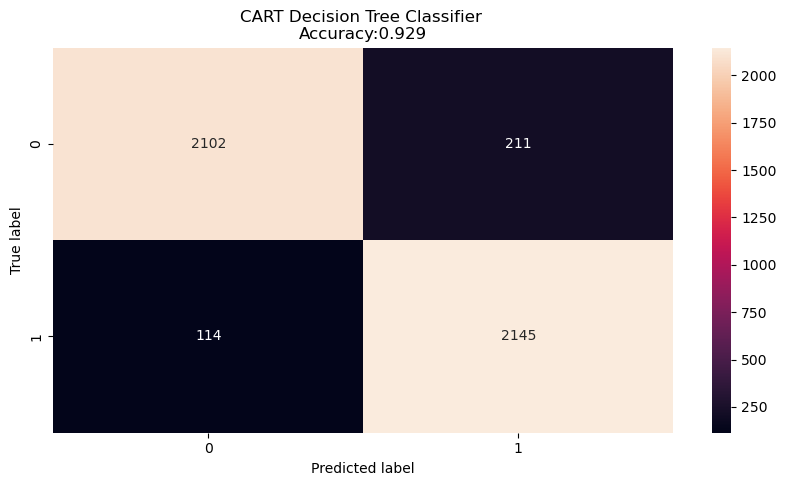

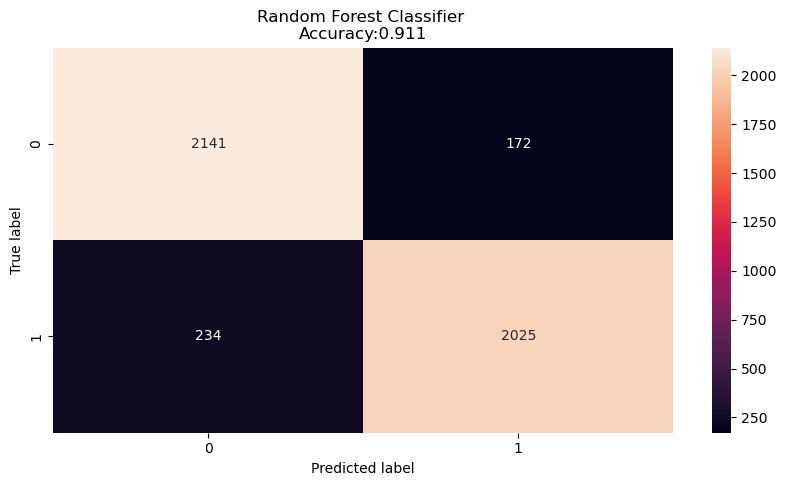

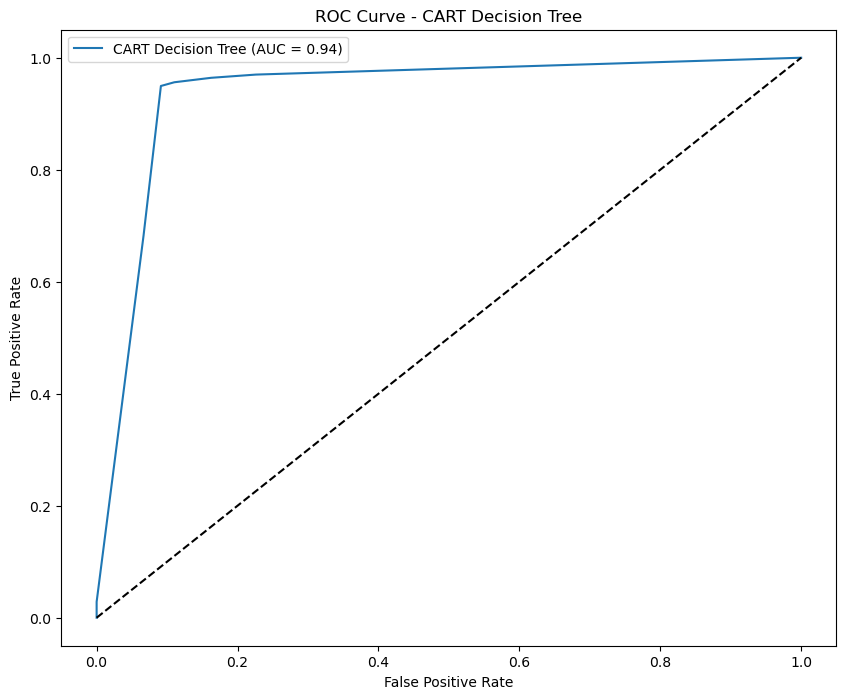

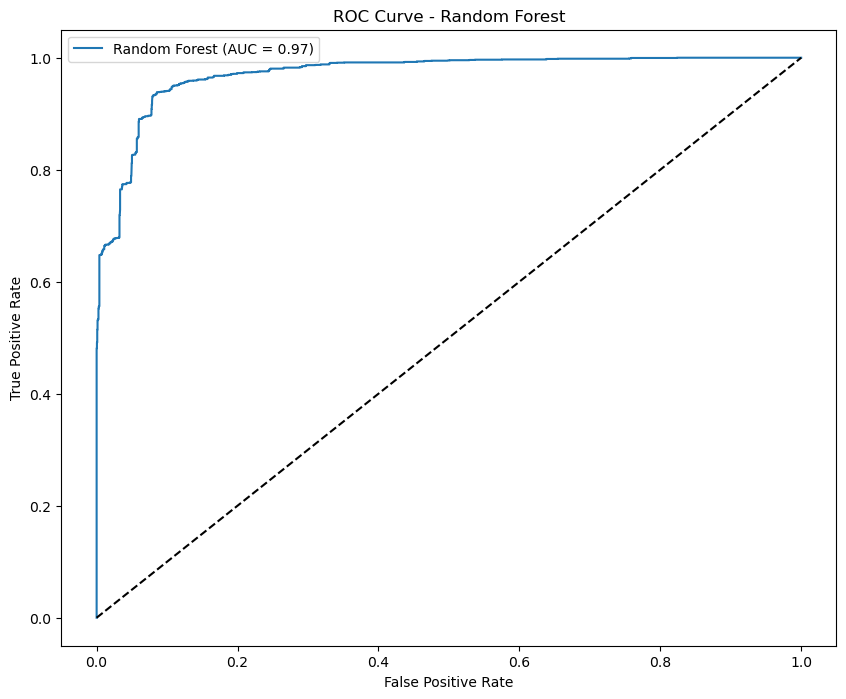

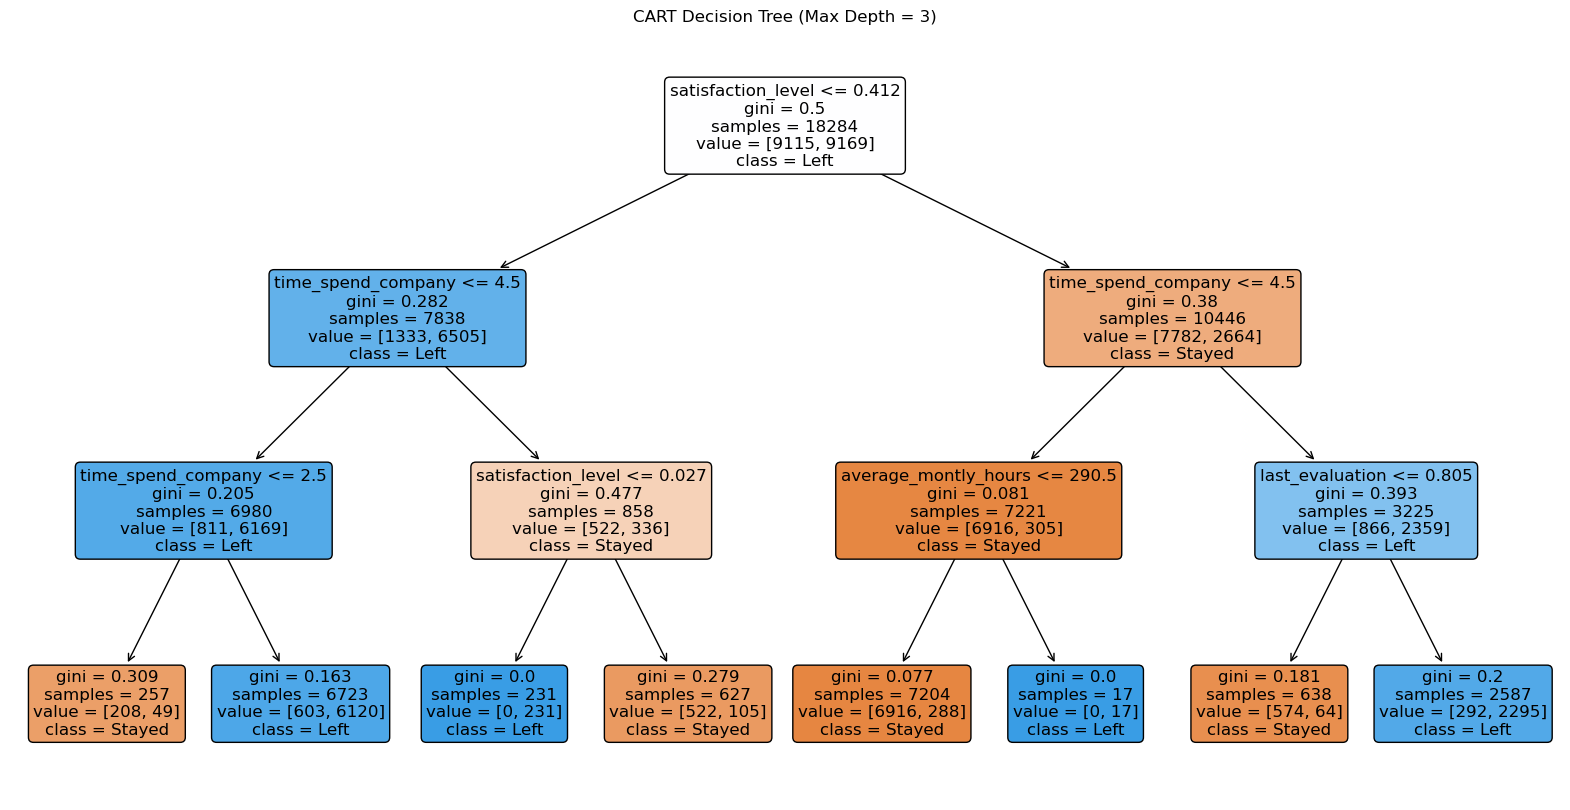

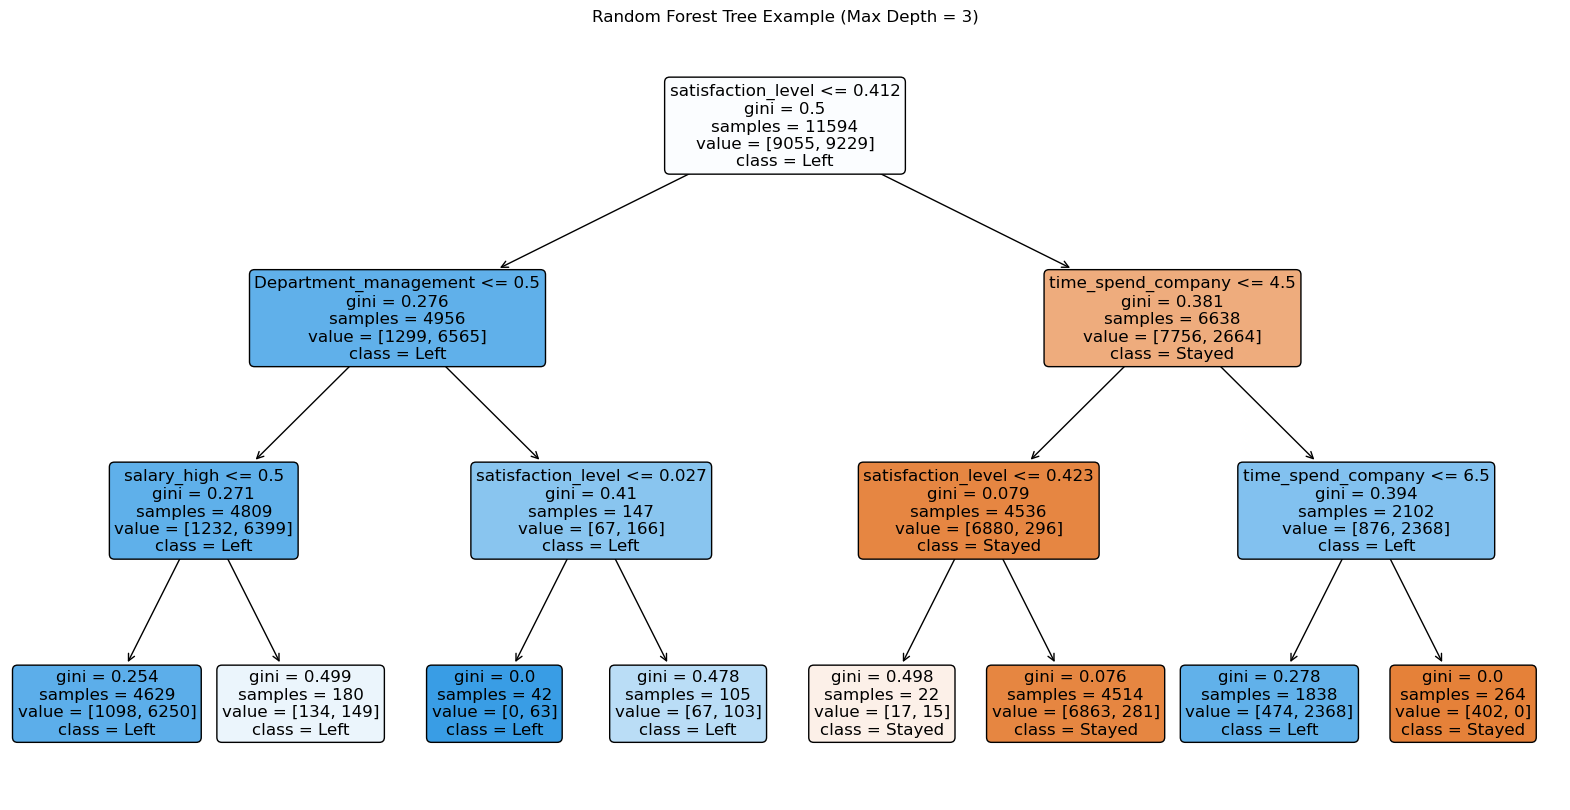

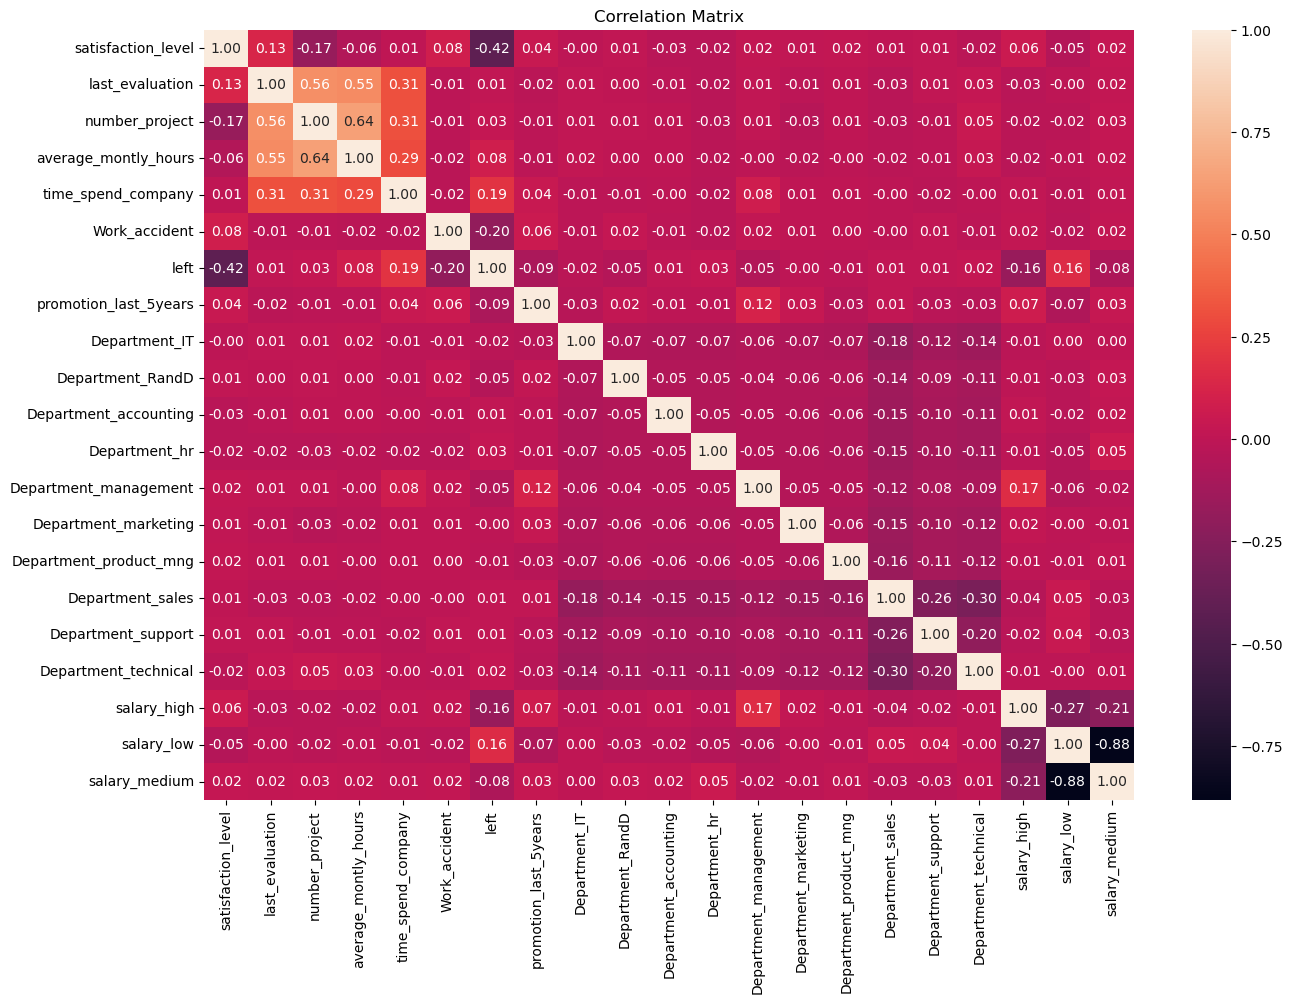

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix
import seaborn as sns
from sklearn.utils import resample

# Load your dataset
df = pd.read_csv('HR_dataset.csv')

# Check for missing values
df.isnull().sum()

# Check for duplicate rows
df.duplicated().sum()

# Normalize the 'satisfaction_level' column
df['satisfaction_level'] = (df['satisfaction_level'] - df['satisfaction_level'].min()) / (df['satisfaction_level'].max() - df['satisfaction_level'].min())

# Separate majority and minority classes
df_majority = df[df.left==0]
df_minority = df[df.left==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_majority.shape[0],    # to match majority class
                                 random_state=42) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Encoding categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df_upsampled, columns=['Department', 'salary'])  # Replace with actual categorical columns

# Define the feature variables (X) and the target variable (y)
X = df_encoded.drop('left', axis=1)
y = df_encoded['left']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the CART decision tree classifier
cart_tree_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

# Initialize the Random Forest classifier
random_forest_classifier = RandomForestClassifier(max_depth=3, random_state=42)

# Train the classifiers
cart_tree_classifier.fit(X_train, y_train)
random_forest_classifier.fit(X_train, y_train)

# Make predictions
cart_tree_predictions = cart_tree_classifier.predict(X_test)
random_forest_predictions = random_forest_classifier.predict(X_test)

# Generate evaluation reports
cart_tree_report = classification_report(y_test, cart_tree_predictions)
random_forest_report = classification_report(y_test, random_forest_predictions)

# Print evaluation reports
print('CART Decision Tree Classifier Report:')
print(cart_tree_report)
print('Random Forest Classifier Report:')
print(random_forest_report)

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, title, accuracy):
    plt.figure(figsize=(10, 5))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'{title} \nAccuracy:{accuracy:.3f}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(classifier, X_test, y_test, title):
    fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
    auc_score = auc(fpr, tpr)
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, label=f'{title} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {title}')
    plt.legend()
    plt.show()

# Plot the confusion matrix for each classifier
plot_confusion_matrix(confusion_matrix(y_test, cart_tree_predictions), 'CART Decision Tree Classifier', accuracy_score(y_test, cart_tree_predictions))
plot_confusion_matrix(confusion_matrix(y_test, random_forest_predictions), 'Random Forest Classifier', accuracy_score(y_test, random_forest_predictions))

# Plot ROC curves
plot_roc_curve(cart_tree_classifier, X_test, y_test, 'CART Decision Tree')
plot_roc_curve(random_forest_classifier, X_test, y_test, 'Random Forest')

# Plot decision trees
plt.figure(figsize=(20,10))
plot_tree(cart_tree_classifier, filled=True, feature_names=list(X_train.columns), 
          class_names=['Stayed', 'Left'], rounded=True, fontsize=12)
plt.title('CART Decision Tree (Max Depth = 3)')
plt.show()

plt.figure(figsize=(20,10))
plot_tree(random_forest_classifier.estimators_[0], filled=True, feature_names=list(X_train.columns), 
          class_names=['Stayed', 'Left'], rounded=True, fontsize=12)
plt.title('Random Forest Tree Example (Max Depth = 3)')
plt.show()

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [11]:
# print head of dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.318681,0.53,2,157,3,0,1,0,sales,low
1,0.780220,0.86,5,262,6,0,1,0,sales,medium
2,0.021978,0.88,7,272,4,0,1,0,sales,medium
3,0.692308,0.87,5,223,5,0,1,0,sales,low
4,0.307692,0.52,2,159,3,0,1,0,sales,low
